# K Nearest Neighbours
What are K Nearest Neighbours?
K Nearest Neighbours is a supervised machine learning algorithm for classification. It is a lazy learning algorithm
which means that it does not learn a discriminative function directly. Instead, it just stores the training
data set as a local replicae. It classifies the new data point by a majority vote of
its k (nearest neighbours, hence the name) of the closest points, whose class are known.

In [8]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# load dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df.drop(['species'],axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
model = KNeighborsClassifier(n_neighbors=5)
# fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(50.722222222222214, 0.5, 'Actual')

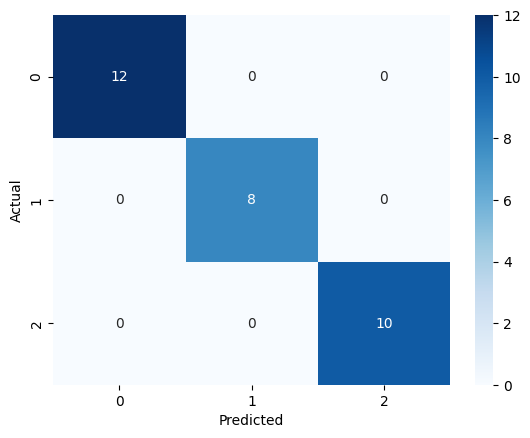

In [13]:
# evaloate the model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## KNN Regressor
What is KNN Regressaor?
KNN Regressor is a supervised machine learning algorithm that is used for regression problems. It is
based on the idea of finding the K nearest neighbors of a given data point and using their labels to
predict the label of the data point. The KNN algorithm is simple and easy to implement, and
it can be used for both classification and regression problems.

In [14]:
# load the dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
X = tips.drop('tip', axis=1)
y = tips['tip']

# Encode the labels and train test split the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'category' or X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)
model.predict([[32, 1, 1, 1, 0, 3]])

c:\Users\UZAIR\miniconda3\envs\py_ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([4.842])